In [3]:
import pandas as pd
import numpy  as np
import configparser
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [4]:
config = configparser.ConfigParser()
config.read("config.cfg")

['config.cfg']

In [5]:
mysql_driver = f"""mysql+pymysql://{config.get('RDS', 'DB_USERNAME')}:{config.get('RDS', 'DB_PASSWORD')}@{config.get('RDS', 'DB_HOST')}:{config.get('RDS', 'DB_PORT')}/{config.get('RDS', 'DB_NAME')}"""

### Cargamos Archivo de airlines.csv

In [8]:
airlines_data = pd.read_csv("data/airlines.csv")
airlines_data.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [10]:
airlines_data.to_sql("airlines",mysql_driver, index=False, if_exists="append")

16

### Cargamos Archivo de airports.csv

In [11]:
airports_data = pd.read_csv("data/airports.csv")
airports_data.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [12]:
airports_data.to_sql("airports",mysql_driver, index=False, if_exists="append")

1458

### Cargamos Archivo de planes.csv

In [51]:
planes_data = pd.read_csv("data/planes.csv")
planes_data.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [14]:
planes_data.to_sql("planes",mysql_driver, index=False, if_exists="append")

3322

### Cargamos Archivo de weather.csv

In [6]:
weather_data = pd.read_csv("data/weather.csv")


# Eliminos aquellas filas que tinene valores nulos en las columnas humid, dewp, temp
weather_data = weather_data[(~weather_data["humid"].isna()) & (~weather_data["dewp"].isna())  & (~weather_data["temp"].isna())] 


# Llenamos los datos faltantes 

weather_data['wind_gust'] = weather_data['wind_gust'].fillna(0)
weather_data['pressure'] = weather_data['pressure'].fillna(0) 

weather_data.to_sql("weather",mysql_driver, index=False, if_exists="append")


In [65]:
weather_data.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,0.0,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,0.0,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,0.0,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,0.0,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,0.0,0.0,1011.9,10.0,2013-01-01T10:00:00Z


### Cargamos Archivo de flights.csv

In [4]:
flights_data = pd.read_csv("data/flights.csv")
flights_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,13,1,2249,72,108.0,2357,71.0,B6,22,N206JB,JFK,SYR,41.0,209,22,49,13/01/2013 22:00
1,2013,2,24,1,2245,76,121.0,2354,87.0,B6,608,N216JB,JFK,PWM,56.0,273,22,45,24/02/2013 22:00
2,2013,3,19,1,2250,71,120.0,5,75.0,B6,30,N228JB,JFK,ROC,54.0,264,22,50,19/03/2013 22:00
3,2013,2,11,1,2100,181,111.0,2225,166.0,WN,530,N231WN,LGA,MDW,117.0,725,21,0,11/02/2013 21:00
4,2013,5,22,1,1935,266,154.0,2140,254.0,EV,4361,N27200,EWR,TYS,94.0,631,19,35,22/05/2013 19:00


In [7]:
df_flights_weather = weather_data.merge(flights_data, left_on = ["year","month","day","hour", "origin"], right_on = ["year","month","day","hour", "origin"], how="inner" )
df_flights_weather = df_flights_weather[["year","month","day","dep_time","sched_dep_time","dep_delay","arr_time","sched_arr_time","arr_delay","carrier","flight","tailnum","origin","dest","air_time","distance","hour","minute","time_hour_x"]]
df_flights_weather.rename(columns={"time_hour_x": "time_hour"}, inplace=True)
df_flights_weather

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,554,558,-4,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z
2,2013,1,1,555,600,-5,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01T11:00:00Z
3,2013,1,1,558,600,-2,923.0,937,-14.0,UA,1124,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01T11:00:00Z
4,2013,1,1,559,600,-1,854.0,902,-8.0,UA,1187,N76515,EWR,LAS,337.0,2227,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272508,2013,12,30,1844,1855,-11,2222.0,2220,2.0,DL,2139,N965DL,LGA,MIA,169.0,1096,18,55,2013-12-30T23:00:00Z
272509,2013,12,30,1848,1855,-7,2057.0,2059,-2.0,US,2039,N194UW,LGA,CLT,90.0,544,18,55,2013-12-30T23:00:00Z
272510,2013,12,30,1848,1850,-2,2208.0,2205,3.0,DL,1854,N348NB,LGA,FLL,165.0,1076,18,50,2013-12-30T23:00:00Z
272511,2013,12,30,1850,1829,21,2052.0,2018,34.0,EV,5274,N755EV,LGA,BNA,146.0,764,18,29,2013-12-30T23:00:00Z


In [8]:
try:
  df_flights_weather.to_sql("flights",mysql_driver, index=False, if_exists="append")
  print("Data written successfully to table", "flights")
except Exception as e:
  print("Error writing data:", e)

Data written successfully to table flights


## Procedemos a leer de la BD las tablas y cargarlas en un DF

In [6]:
sql_query = "SELECT * FROM flights;"
df_flights = pd.read_sql(sql_query,mysql_driver)
df_flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 10:00:00
1,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 10:00:00
2,2013,1,1,622,630,-8,1017,1014,3,US,245,N807AW,EWR,PHX,342,2133,6,30,2013-01-01 11:00:00
3,2013,1,1,601,600,1,844,850,-6,B6,343,N644JB,EWR,PBI,147,1023,6,0,2013-01-01 11:00:00
4,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272508,2013,12,30,1848,1855,-7,2057,2059,-2,US,2039,N194UW,LGA,CLT,90,544,18,55,2013-12-30 23:00:00
272509,2013,12,30,1844,1855,-11,2222,2220,2,DL,2139,N965DL,LGA,MIA,169,1096,18,55,2013-12-30 23:00:00
272510,2013,12,30,1840,1845,-5,2036,2054,-18,DL,2458,N941DL,LGA,DTW,86,502,18,45,2013-12-30 23:00:00
272511,2013,12,30,1850,1829,21,2052,2018,34,EV,5274,N755EV,LGA,BNA,146,764,18,29,2013-12-30 23:00:00


In [7]:
sql_query = "SELECT * FROM airports;"
df_airports = pd.read_sql(sql_query,mysql_driver)
df_airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-100.000000,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [8]:
sql_query = "SELECT * FROM airlines;"
df_airlines = pd.read_sql(sql_query,mysql_driver)
df_airlines

,carrier,name
0,FL,AirTran Airways Corporation
1,AS,Alaska Airlines Inc.
2,AA,American Airlines Inc.
3,DL,Delta Air Lines Inc.
4,9E,Endeavor Air Inc.
5,MQ,Envoy Air
6,EV,ExpressJet Airlines Inc.
7,F9,Frontier Airlines Inc.
8,HA,Hawaiian Airlines Inc.
9,B6,JetBlue Airways


In [9]:
sql_query = "SELECT * FROM planes;"
df_planes = pd.read_sql(sql_query,mysql_driver)
df_planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,0,Turbo-fan
1,N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0,Turbo-fan
2,N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0,Turbo-fan
3,N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0,Turbo-fan
4,N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,0,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002,Fixed wing multi engine,BOEING,717-200,2,100,0,Turbo-fan
3318,N997DL,1992,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,0,Turbo-fan
3319,N998AT,2002,Fixed wing multi engine,BOEING,717-200,2,100,0,Turbo-fan
3320,N998DL,1992,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,0,Turbo-jet


In [10]:
sql_query = "SELECT * FROM weather;"
df_weather = pd.read_sql(sql_query,mysql_driver)
df_weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35700,0.0000,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,0.0000,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,0.0000,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65860,0.0000,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65860,0.0000,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26106,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80940,21.8648,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26107,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.8648,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26108,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96010,23.0156,0.0,1019.5,10.0,2013-12-30T21:00:00Z
26109,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,0.0000,0.0,1019.9,10.0,2013-12-30T22:00:00Z


### 1. ¿En que país y que avión se encuentra entre el 85% y el 70% de la cantidad de aterrizajes? Proporcione el nombre del país y el nombre del avión.

In [33]:
# por separado se creo un archivo csv donde se calculo el pais
airports_country = pd.read_csv("data/airports_country.csv")
airports_country.head()

,faa,name,lat,lon,alt,tz,dst,tzone,country
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York,United States
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago,United States
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago,United States
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York,United States
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York,United States


In [72]:
# hacemos el merge de flights-airports
df_flights_airports = df_flights.merge(airports_country, left_on = ["dest"], right_on = ["faa"], how="inner" )

# Agrupar por país y contar el total de vuelos
flights_by_country = merged_df.groupby('country').size().reset_index(name='total_flights')

# Mostrar el resultado
print(flights_by_country)

# Calcular la cantidad de registros únicos
total_registros = df_flights.shape[0]

# Calcular el porcentaje de aterrizajes por país y avión
df_agrupado_flight = df_flights.groupby(['tailnum']).size().reset_index(name='count') 

# Calcular el porcentaje de registros únicos para cada combinación de tailnum y dest
df_agrupado_flight['porcentaje'] = df_agrupado_flight['count'] / total_registros 

df_ordenado_flight = df_agrupado_flight.sort_values('porcentaje')

# Recalcular la cantidad de registros únicos y agrupados 
total_registros = df_ordenado_flight.shape[0]

# Reiniciamos el indice para sacar el porcentaje del agrupamiento
df_ordenado_flight = df_ordenado_flight.reset_index(inplace=False)

df_ordenado_flight.columns = ['index', 'tailnum', 'contador', 'porcentaje_vuelos']

df_ordenado_flight['porcentaje_agrupado'] = 0.0

# Calcular el porcentaje de registros únicos para cada combinación de tailnum y dest
for i in range(len(df_ordenado_flight)):
    df_ordenado_flight.loc[i, 'porcentaje_agrupado']= i / total_registros 
 
df_ordenado_flight
# Calcular el umbral del 70% y 80% de los registros únicos
umbral_70 = 0.7 
umbral_85 = 0.85  

# Seleccionar las combinaciones de tailnum y country que superan el umbral
concentracion = df_ordenado_flight[(df_ordenado_flight['porcentaje_agrupado'] >= umbral_70) & (df_ordenado_flight['porcentaje_agrupado'] <= umbral_85)]
# Al hacer el merge se detecto que United States es el unico pais de los vuelos por lo que se dejo como constante
concentracion["Pais"] = flights_by_country.loc[0, 'country']

# Imprimir los resultados
print("Combinaciones de tailnum y dest con una concentración del 85% y el 70%o de los registros únicos:")
print(concentracion[["tailnum","porcentaje_agrupado","Pais"]])

         country  total_flights
0  United States         272513
Combinaciones de tailnum y dest con una concentración del 85% y el 70%o de los registros únicos:
     tailnum  porcentaje_agrupado           Pais
2322  N920DL             0.700241  United States
2323  N975DL             0.700543  United States
2324  N33264             0.700844  United States
2325  N482UA             0.701146  United States
2326  N320US             0.701448  United States
...      ...                  ...            ...
2814  N38727             0.848613  United States
2815  N337NB             0.848914  United States
2816  N830AS             0.849216  United States
2817  N23707             0.849517  United States
2818  N33714             0.849819  United States

[497 rows x 3 columns]


C:\Users\jggl_\AppData\Local\Temp\ipykernel_16180\3694266078.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concentracion["Pais"] = flights_by_country.loc[0, 'country']


### 2. ¿Indique cual es el aeropuerto con la temperatura más alta registrada en los datos?

In [38]:
# hacemos el merge de flights-airports-weather
df_flights_weather = df_weather.merge(df_flights, left_on = ["year","month","day","hour", "origin"], right_on = ["year","month","day","hour", "origin"], how="inner" )
#df_flights_weather_airports = df_flights_weather.merge(flights_data, left_on = ["year","month","day","hour", "origin"], right_on = ["year","month","day","hour", "origin"], how="inner" )
df_flights_weather_airports = df_flights_weather.merge(df_airports, left_on = ["origin"], right_on = ["faa"], how="inner" )
df_flights_weather_airports


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,...,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone,Pais
0,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.6586,...,2013-01-01 10:00:00,EWR,Newark Liberty Intl,40.692500,-74.168667,18,-5,A,America/New_York,NaN
1,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.6586,...,2013-01-01 10:00:00,EWR,Newark Liberty Intl,40.692500,-74.168667,18,-5,A,America/New_York,NaN
2,EWR,2013,1,1,6,37.94,28.04,67.21,240.0,11.5078,...,2013-01-01 11:00:00,EWR,Newark Liberty Intl,40.692500,-74.168667,18,-5,A,America/New_York,NaN
3,EWR,2013,1,1,6,37.94,28.04,67.21,240.0,11.5078,...,2013-01-01 11:00:00,EWR,Newark Liberty Intl,40.692500,-74.168667,18,-5,A,America/New_York,NaN
4,EWR,2013,1,1,6,37.94,28.04,67.21,240.0,11.5078,...,2013-01-01 11:00:00,EWR,Newark Liberty Intl,40.692500,-74.168667,18,-5,A,America/New_York,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272508,LGA,2013,12,30,18,28.94,10.94,46.41,330.0,18.4125,...,2013-12-30 23:00:00,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York,NaN
272509,LGA,2013,12,30,18,28.94,10.94,46.41,330.0,18.4125,...,2013-12-30 23:00:00,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York,NaN
272510,LGA,2013,12,30,18,28.94,10.94,46.41,330.0,18.4125,...,2013-12-30 23:00:00,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York,NaN
272511,LGA,2013,12,30,18,28.94,10.94,46.41,330.0,18.4125,...,2013-12-30 23:00:00,LGA,La Guardia,40.777245,-73.872608,22,-5,A,America/New_York,NaN


In [44]:
df_flights_weather_airports

# Creamos una df temporal, solo para no cargar todos los datos, 
# Name: es el nombre del aeropuerto 
# temp: la temperatura de el df de weather 
datos_temp = df_flights_weather_airports[['name', 'temp']]

# sacamos el valor maximo de temperatura en el df
temp_max = datos_temp['temp'].max()

# filtramos nuestro df con el valor maximo de temperatura 
datos_max = datos_temp[datos_temp['temp'] == temp_max]

# Mostramos el primer registro que cumpla con la temperatura maxima
print(f"Aeropuerto con la temperatura más alta: {datos_max['name'].values[0]}")

Aeropuerto con la temperatura más alta: Newark Liberty Intl


### 3. ¿Cuál es la áreaolinea con la menor cantidad de vuelos registrados, indique cuantos vuelos, el código de la áreaolinea, el nombre completo?

In [56]:
# hacemos el merge de flights-airlines
df_flights_airlines = df_flights.merge(df_airlines, left_on = ["carrier"], right_on = ["carrier"], how="inner" )
df_flights_airlines.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 10:00:00,United Air Lines Inc.
1,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 10:00:00,United Air Lines Inc.
2,2013,1,1,643,646,-3,922,940,-18,UA,556,N497UA,EWR,PBI,146,1023,6,46,2013-01-01 11:00:00,United Air Lines Inc.
3,2013,1,1,607,607,0,858,915,-17,UA,1077,N53442,EWR,MIA,157,1085,6,7,2013-01-01 11:00:00,United Air Lines Inc.
4,2013,1,1,732,645,47,1011,941,30,UA,1111,N37456,EWR,MCO,145,937,6,45,2013-01-01 11:00:00,United Air Lines Inc.


In [149]:
# Seleccionar las columnas relevantes
df_vuelos = df_flights_airlines[['carrier', 'name','flight']]

# Agrupar por carrier y calcular el total de vuelos
df_agrupado = df_vuelos.groupby(['name','carrier'])
df_agrupado = df_agrupado.count()

# Ordenar por la cantidad de vuelos
df_ordenado = df_agrupado.sort_values('flight')

# sacamos el valor minimo de flight en el df
flight_min = df_ordenado['flight'].min()

# filtramos nuestro df con el valor minimo de flight 
datos_min = df_ordenado[df_ordenado['flight'] == flight_min]
print("Aerolínea con la menor cantidad de vuelos: ")
datos_min


Aerolínea con la menor cantidad de vuelos: 


,,flight
name,carrier,
SkyWest Airlines Inc.,OO,29


### 4. Indique la media, median, minimo, maximo y desviación estándar de las millas recorridas por cada avión, debe mostrar el nombre del avión y la información estadística en columnas adicionales

In [114]:
# hacemos el merge de flights-planes
df_flights_planes = df_flights.merge(df_planes, left_on = ["tailnum"], right_on = ["tailnum"], how="inner" )
df_flights_planes.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,517,515,2,830,819,11,UA,...,15,2013-01-01 10:00:00,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan
1,2013,1,8,1435,1440,-5,1717,1746,-29,UA,...,40,2013-01-08 19:00:00,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan
2,2013,1,9,717,700,17,812,815,-3,UA,...,0,2013-01-09 12:00:00,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan
3,2013,1,9,1143,1144,-1,1425,1445,-20,UA,...,44,2013-01-09 16:00:00,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan
4,2013,1,13,835,824,11,1030,951,39,UA,...,24,2013-01-13 13:00:00,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan


In [142]:
df_planes_distance = df_flights_planes[['tailnum', 'distance']]

# Calcular las medidas estadísticas por cada avión
estadisticas_por_avion = df_planes_distance.groupby('tailnum')['distance'].agg(['mean', 'median', 'min', 'max', 'std', 'sum']).reset_index()

# Renombrar las columnas para mayor claridad
estadisticas_por_avion.columns = ['nombre_avion', 'media', 'mediana', 'minimo', 'maximo', 'desviacion_estandar', 'Total Millas']
estadisticas_por_avion

,nombre_avion,media,mediana,minimo,maximo,desviacion_estandar,Total Millas
0,N10156,754.395833,725.0,116,1325,332.604623,108633
1,N102UW,535.875000,541.0,529,544,6.749704,25722
2,N103US,535.000000,529.0,529,544,6.553972,24075
3,N104UW,535.255319,529.0,529,544,6.818989,25157
4,N10575,519.985130,533.0,80,1131,235.264030,139876
...,...,...,...,...,...,...,...
3311,N997AT,677.116279,762.0,397,762,156.023840,29116
3312,N997DL,866.435484,950.0,187,1096,225.485387,53719
3313,N998AT,586.800000,762.0,397,762,186.114212,14670
3314,N998DL,854.684211,950.0,187,1096,233.647553,64956


### 5. Muestre un cubo de información incluyendo la información de todas las tablas proporcionadas.

In [22]:
# Hacemos primero merge con todos los df
# merger de flights con weather
df_flights_weather = df_weather.merge(df_flights, left_on = ["year","month","day","hour", "origin"], right_on = ["year","month","day","hour", "origin"], how="inner" )
# Renombro las columnas de time_hour ya que tienen el mismo nombre pero los datos son diferentes
df_flights_weather.rename(columns={"time_hour_x": "time_hour_flight","time_hour_y": "time_hour_weather"}, inplace=True)

# merge de flights con weather con airports
df_flights_weather_airports = df_flights_weather.merge(df_airports, left_on = ["origin"], right_on = ["faa"], how="inner" )

# merge de flights con weather con airports con planes
df_flights_weather_airports_planes = df_flights_weather_airports.merge(df_planes, left_on = ["tailnum"], right_on = ["tailnum"], how="inner" )
df_flights_weather_airports_planes.rename(columns={"year_x": "year","year_y": "year_airpot"}, inplace=True)

# merge de flights con weather con airports con planes con airlines
df_flights_weather_airports_planes_airlines = df_flights_weather_airports_planes.merge(df_airlines, left_on = ["carrier"], right_on = ["carrier"], how="inner" )
df_flights_weather_airports_planes_airlines.rename(columns={"name_x": "name_airports","name_y": "name_airlines"}, inplace=True)

df_cubo = df_flights_weather_airports_planes_airlines
df_cubo

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,...,tzone,year_airpot,type,manufacturer,model,engines,seats,speed,engine,name_airlines
0,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65860,...,America/New_York,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan,United Air Lines Inc.
1,EWR,2013,1,8,14,48.92,30.02,47.86,220.0,11.50780,...,America/New_York,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan,United Air Lines Inc.
2,EWR,2013,1,9,7,33.98,30.02,85.24,260.0,4.60312,...,America/New_York,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan,United Air Lines Inc.
3,EWR,2013,1,9,11,46.94,33.98,60.47,230.0,5.75390,...,America/New_York,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan,United Air Lines Inc.
4,EWR,2013,1,13,8,44.06,44.06,100.00,0.0,0.00000,...,America/New_York,1999,Fixed wing multi engine,BOEING,737-824,2,149,0,Turbo-fan,United Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272508,LGA,2013,8,28,17,77.00,69.98,78.96,0.0,0.00000,...,America/New_York,2003,Fixed wing multi engine,BOMBARDIER INC,CL-600-2D24,2,95,0,Turbo-fan,Mesa Airlines Inc.
272509,LGA,2013,8,26,17,82.04,60.98,48.93,250.0,11.50780,...,America/New_York,1986,Fixed wing multi engine,AVIONS MARCEL DASSAULT,MYSTERE FALCON 900,3,12,0,Turbo-fan,Mesa Airlines Inc.
272510,LGA,2013,9,30,17,69.08,51.08,52.67,180.0,6.90468,...,America/New_York,1986,Fixed wing multi engine,AVIONS MARCEL DASSAULT,MYSTERE FALCON 900,3,12,0,Turbo-fan,Mesa Airlines Inc.
272511,LGA,2013,12,23,17,50.00,46.04,86.19,320.0,6.90468,...,America/New_York,1986,Fixed wing multi engine,AVIONS MARCEL DASSAULT,MYSTERE FALCON 900,3,12,0,Turbo-fan,Mesa Airlines Inc.


### a. Indique la cantidad de filas y columnas

In [23]:
print("La cantidad de filas es: " ,df_cubo.shape[0])
print("La cantidad de columnas es: ",df_cubo.shape[1])

La cantidad de filas es:  272513
La cantidad de columnas es:  46


### b. Indique cuantas y cuales son las variables categoricas, continuas, discretas y de fecha y hora.

In [89]:
df_cubo.dtypes

origin                       object
year                          int64
month                         int64
day                           int64
hour                          int64
temp                        float64
dewp                        float64
humid                       float64
wind_dir                    float64
wind_speed                  float64
wind_gust                   float64
precip                      float64
pressure                    float64
visib                       float64
time_hour_flight             object
dep_time                      int64
sched_dep_time                int64
dep_delay                     int64
arr_time                      int64
sched_arr_time                int64
arr_delay                     int64
carrier                      object
flight                        int64
tailnum                      object
dest                         object
air_time                      int64
distance                      int64
minute                      

In [24]:
cantidad_categoricas = 0  
cantidad_continuas = 0 
cantidad_discretas = 0 
cantidad_fecha_hora = 0 

categoricas = []  
continuas = []
discretas = []
fecha_hora = []  

for columna in df_cubo.columns:    
    tipo_dato = df_cubo[columna].dtype

    if (tipo_dato == "int64" or tipo_dato == "float64"):
        if (df_cubo[columna].nunique()>30):
            cantidad_continuas = cantidad_continuas + 1            
            continuas.append(columna)
        else:
            cantidad_discretas = cantidad_discretas + 1
            discretas.append(columna)
    
    elif (tipo_dato == "object" or tipo_dato == "bool" or tipo_dato == "Categórica"):  
        cantidad_categoricas = cantidad_categoricas + 1
        categoricas.append(columna)
    elif (tipo_dato == "datetime64[ns]"):          
        cantidad_fecha_hora = cantidad_fecha_hora + 1
        fecha_hora.append(columna)
    
    
print(f"Columnas Tipo continuas: {cantidad_continuas}")
print(continuas)
print("")
print("")
print(f"Columnas Tipo discretas: {cantidad_discretas}")
print(discretas)
print("")
print("")
print(f"Columnas Tipo categoricas: {cantidad_categoricas}")
print(categoricas)
print("")
print("")
print(f"Columnas Tipo fecha_hora: {cantidad_fecha_hora}")
print(fecha_hora)
print("")
print("")



Columnas Tipo continuas: 21
['day', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'air_time', 'distance', 'minute', 'year_airpot', 'seats']


Columnas Tipo discretas: 10
['year', 'month', 'hour', 'visib', 'lat', 'lon', 'alt', 'tz', 'engines', 'speed']


Columnas Tipo categoricas: 14
['origin', 'time_hour_flight', 'carrier', 'tailnum', 'dest', 'faa', 'name_airports', 'dst', 'tzone', 'type', 'manufacturer', 'model', 'engine', 'name_airlines']


Columnas Tipo fecha_hora: 1
['time_hour_weather']




### c. Muestre una gráfica
- de barras para la cantidad de las variables categoricas y discretas.
- De densidad para las variables continuas.
- Serie de tiempo con el conteo de apariciones para las de fecha y hora.

### de barras para la cantidad de las variables categoricas y discretas.

---------------------------------------------------------------


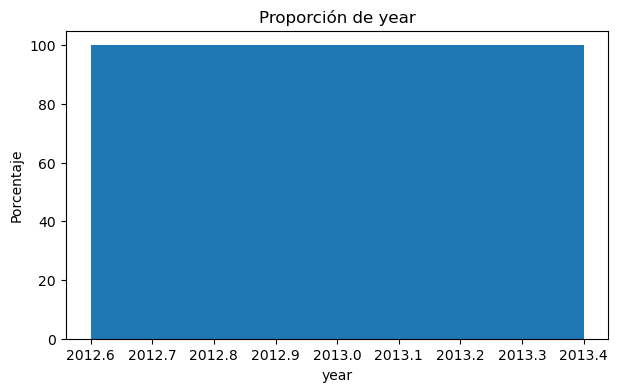

---------------------------------------------------------------


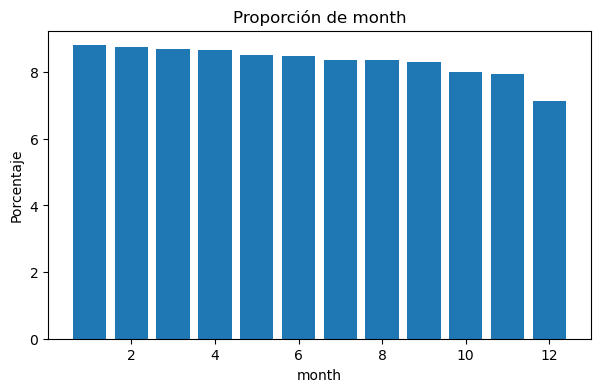

---------------------------------------------------------------


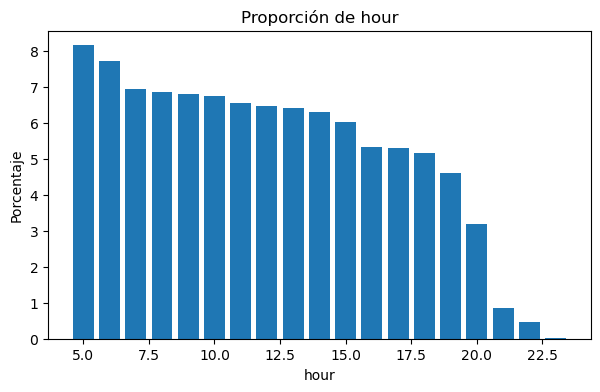

---------------------------------------------------------------


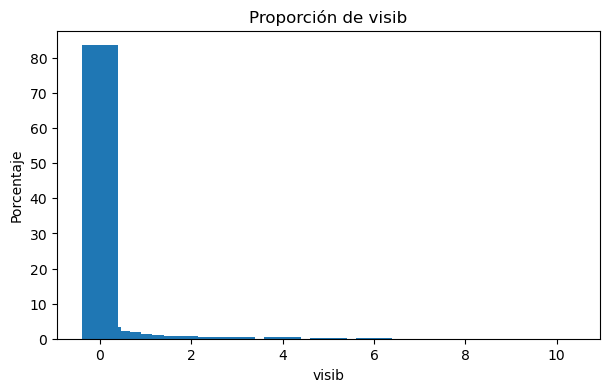

---------------------------------------------------------------


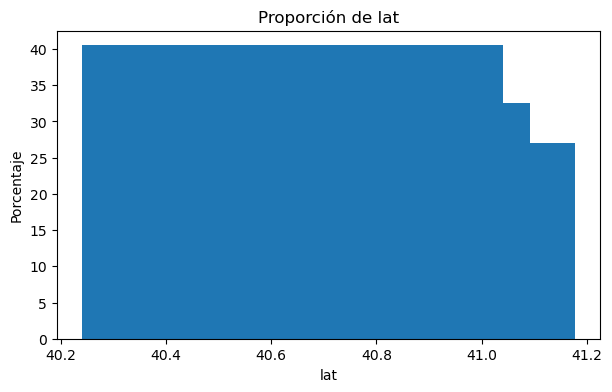

---------------------------------------------------------------


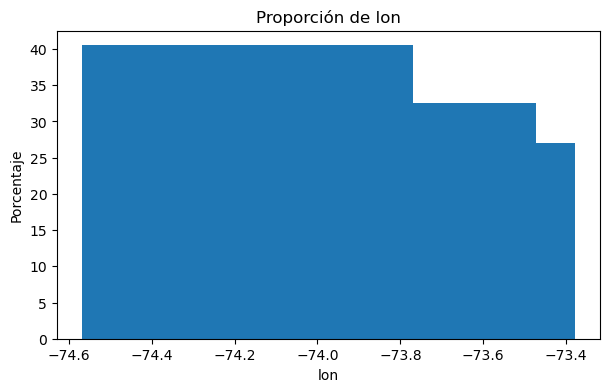

---------------------------------------------------------------


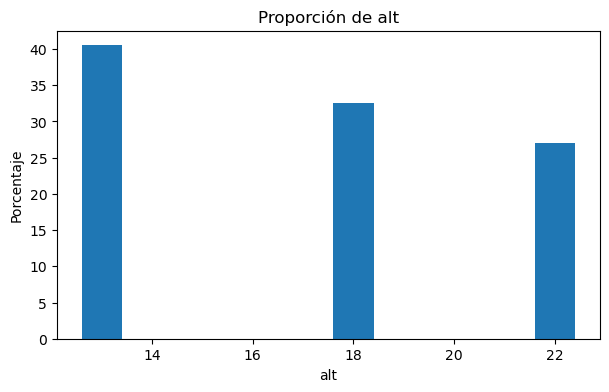

---------------------------------------------------------------


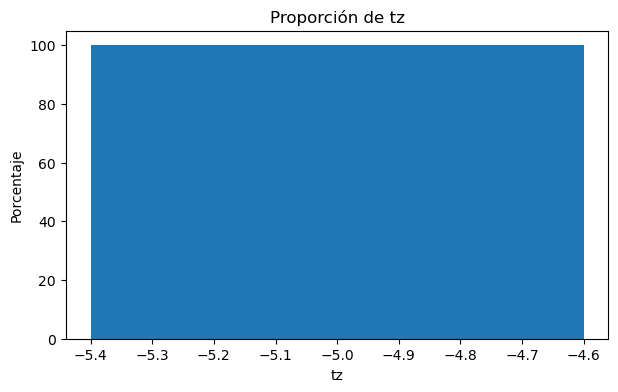

---------------------------------------------------------------


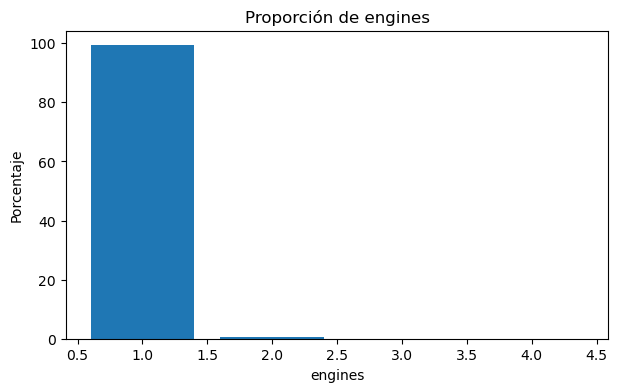

---------------------------------------------------------------


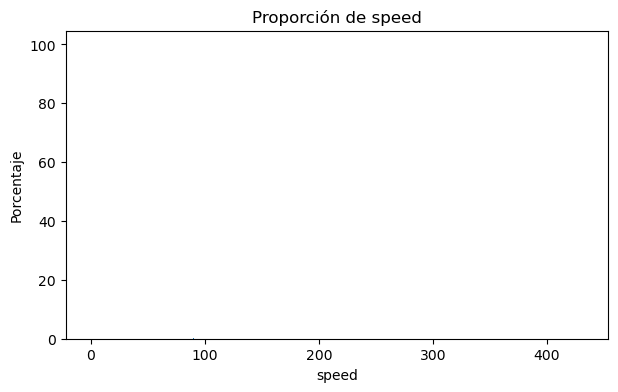

---------------------------------------------------------------


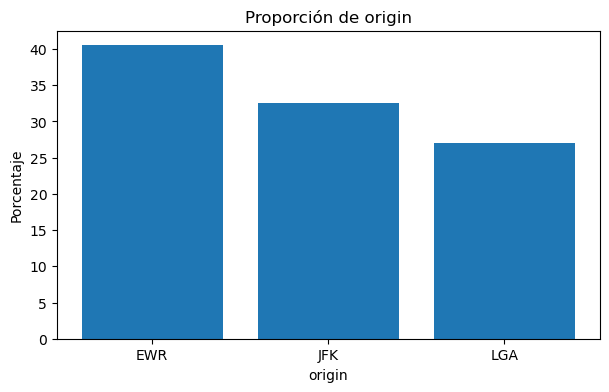

---------------------------------------------------------------


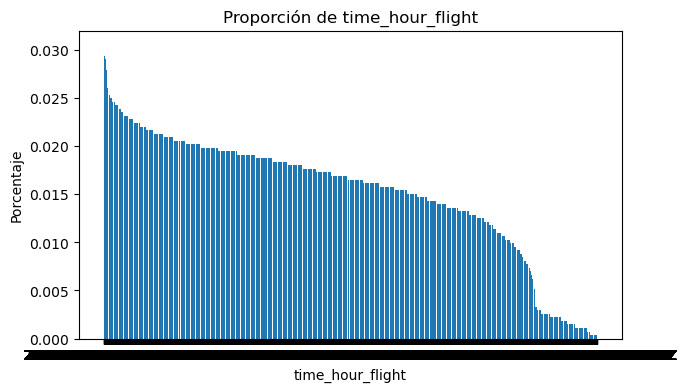

---------------------------------------------------------------


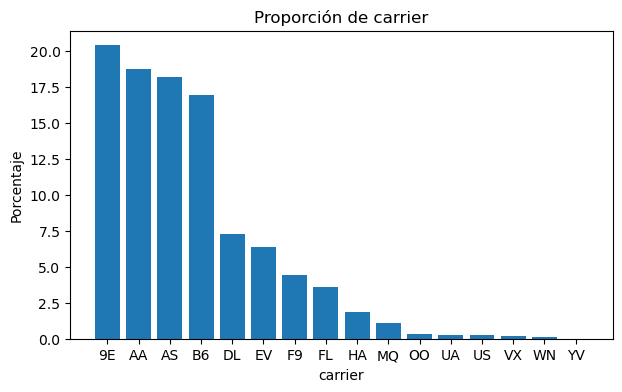

---------------------------------------------------------------


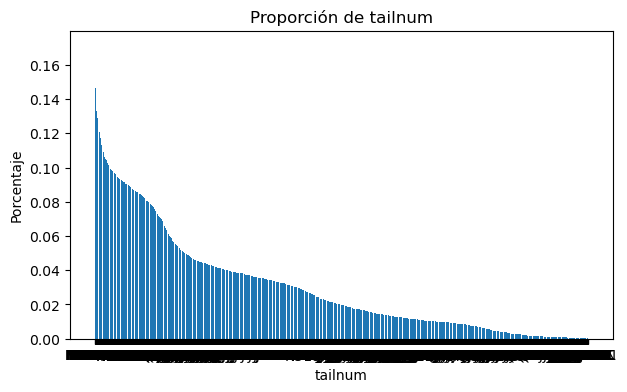

---------------------------------------------------------------


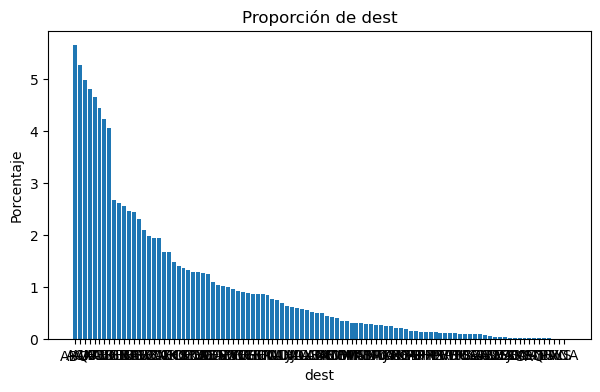

---------------------------------------------------------------


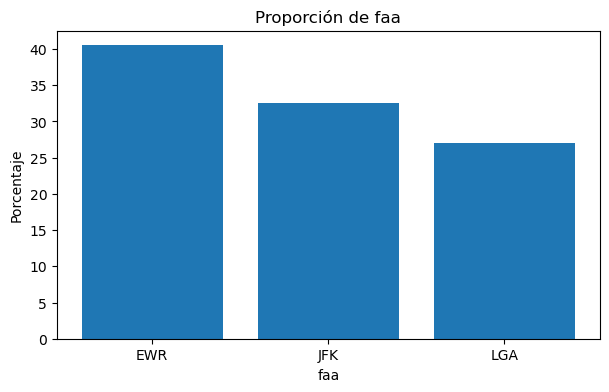

---------------------------------------------------------------


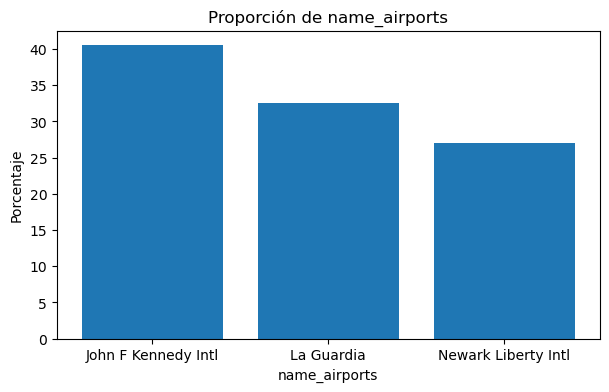

---------------------------------------------------------------


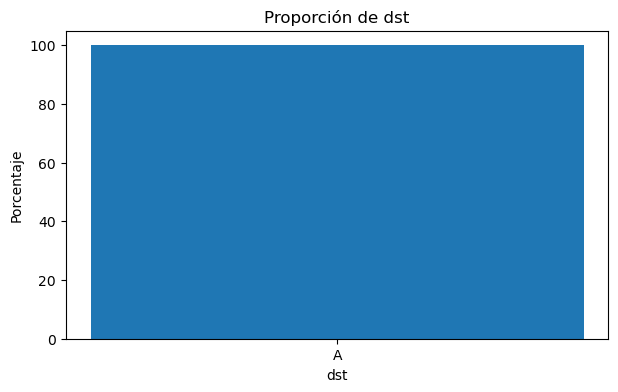

---------------------------------------------------------------


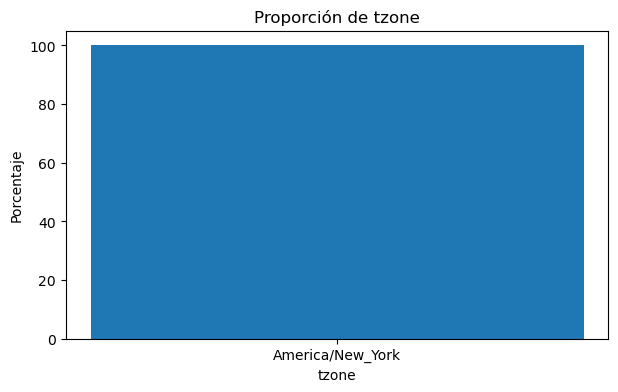

---------------------------------------------------------------


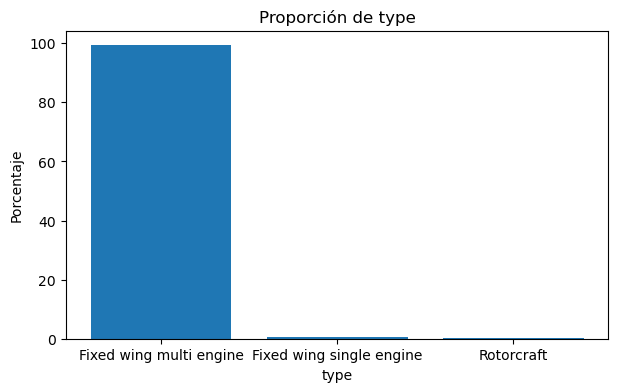

---------------------------------------------------------------


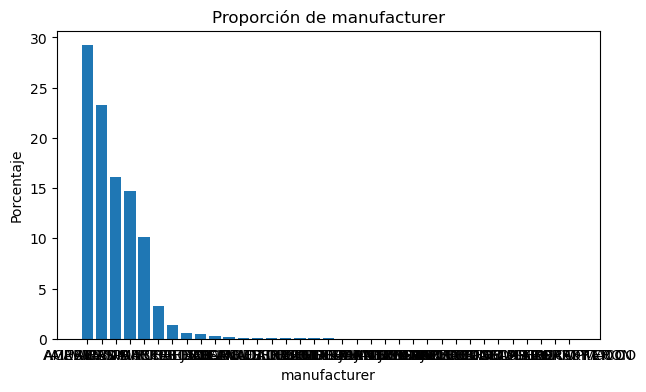

---------------------------------------------------------------


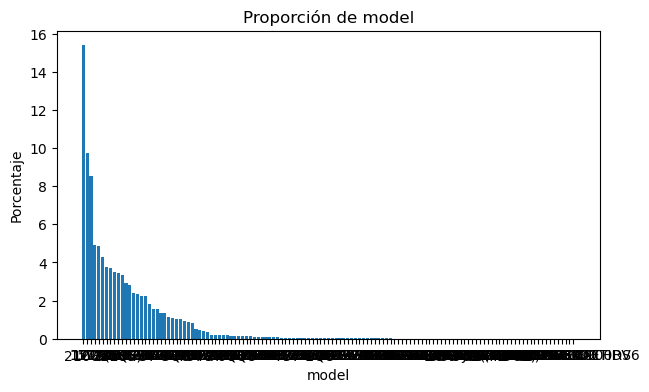

---------------------------------------------------------------


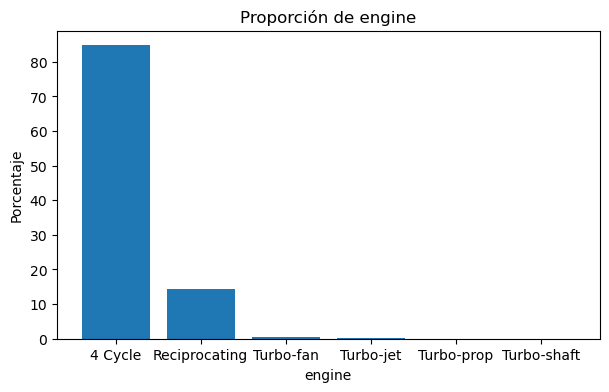

---------------------------------------------------------------


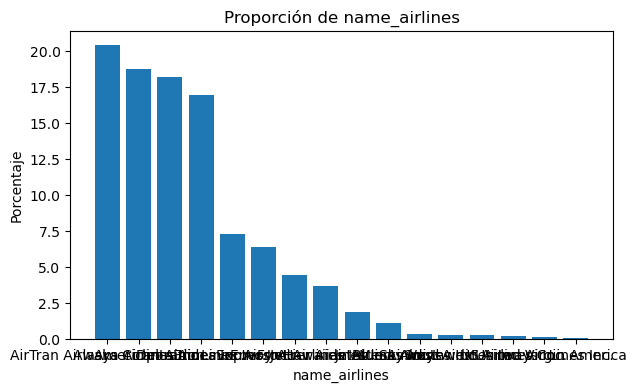

In [28]:
# Genero una lista con las 2 categorias las cuales va a recorrer el for
categoricas_discretas = discretas + categoricas  

for columna in categoricas_discretas:  
    columna_count = df_cubo[columna].value_counts(normalize = True) *100
    x = list(columna_count.index)
    x.sort()  
    plt.figure(figsize=(7,4))
    plt.bar(x,columna_count, label=columna_count)
    plt.title("Proporción de "+columna)
    plt.xlabel(columna)
    plt.ylabel("Porcentaje") 
    print("---------------------------------------------------------------")
    plt.show() 

# Creamos una figura para contener los histogramas

In [ ]:
density = kde.gaussian_k(dataset["adr"])
x = dataset["adr"]
y = density(x)

### De densidad para las variables continuas.

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


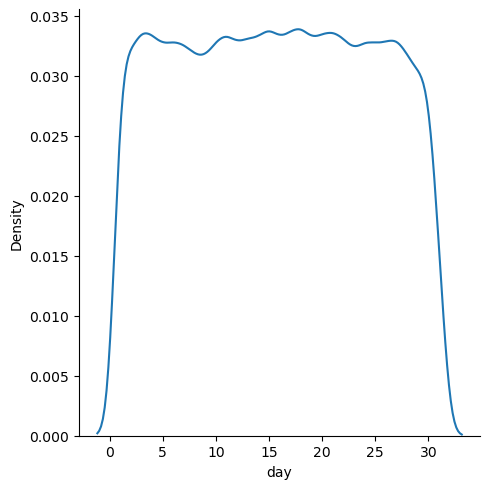

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


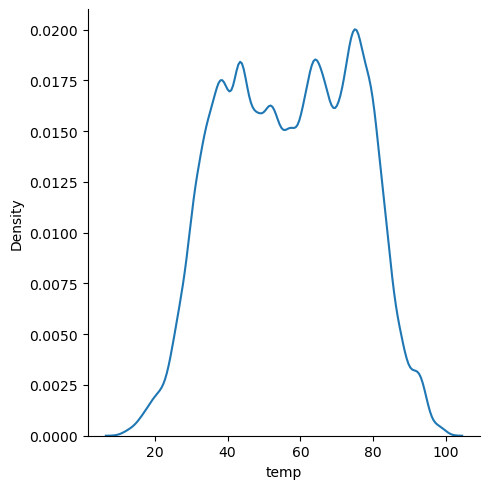

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


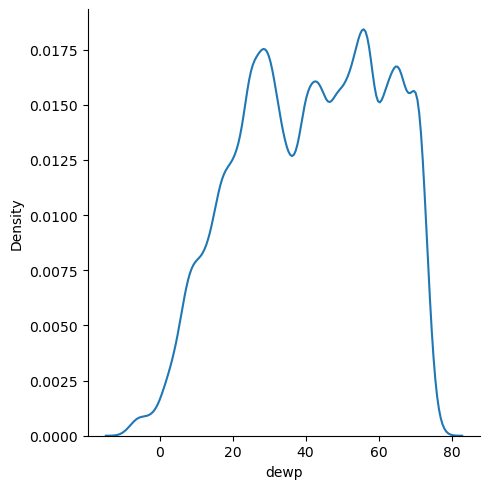

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


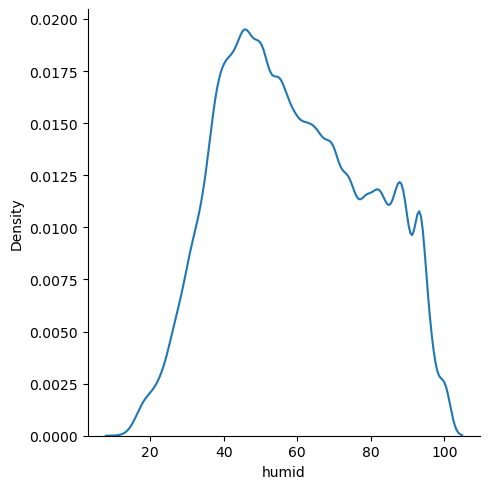

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


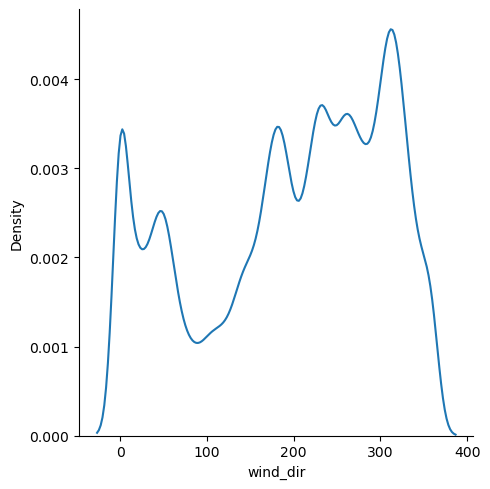

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


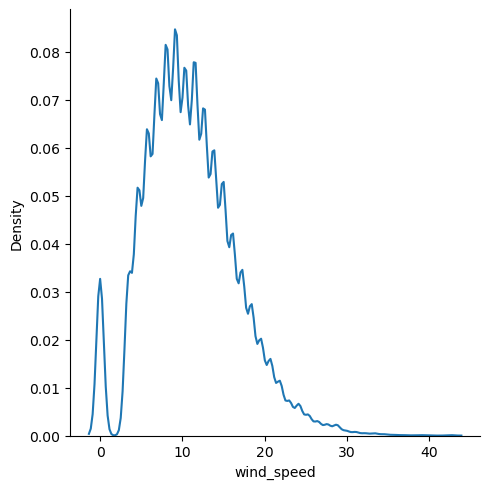

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


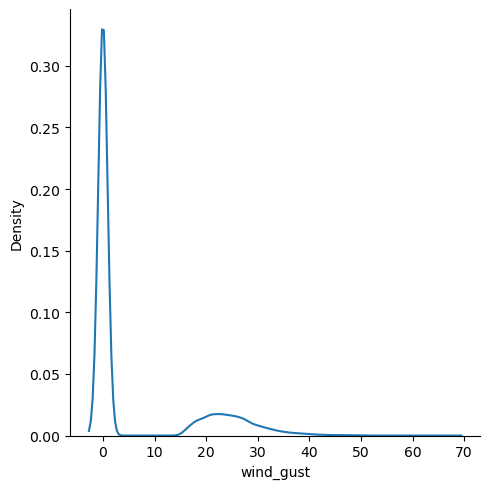

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


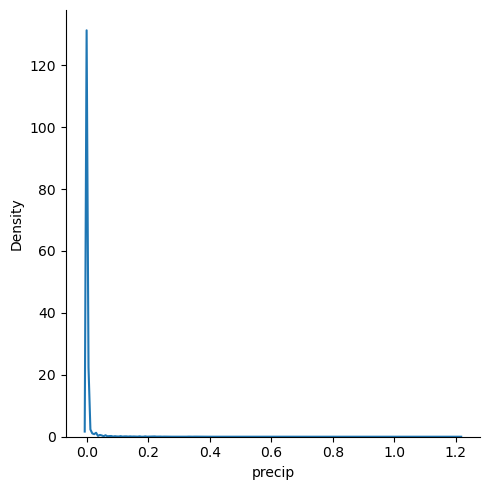

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


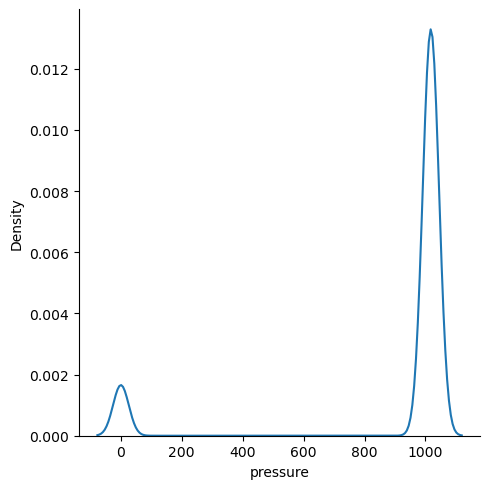

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


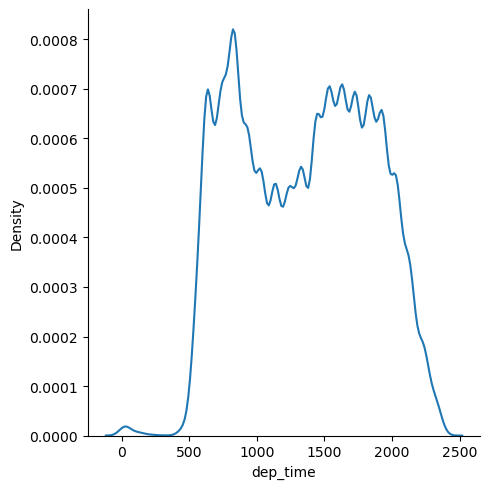

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


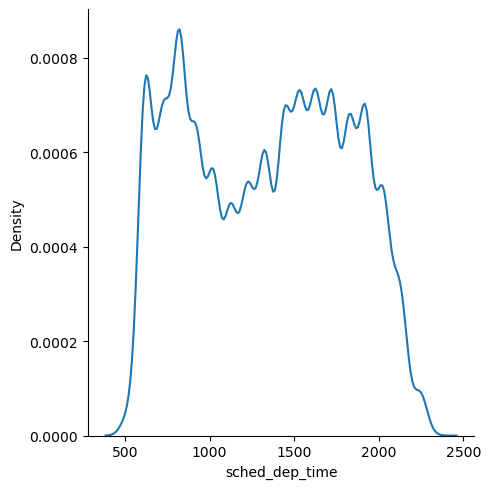

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


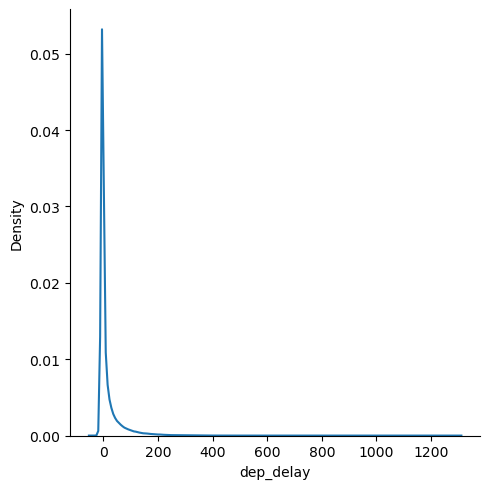

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


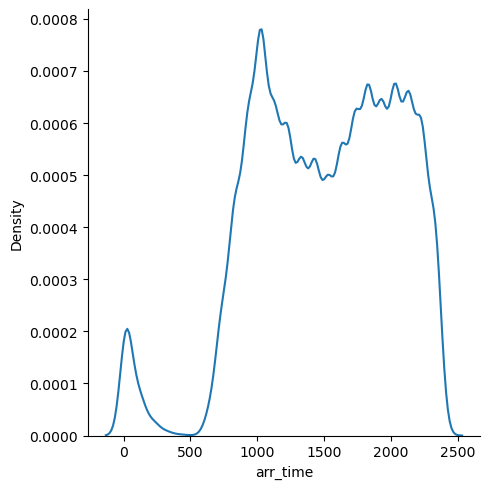

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


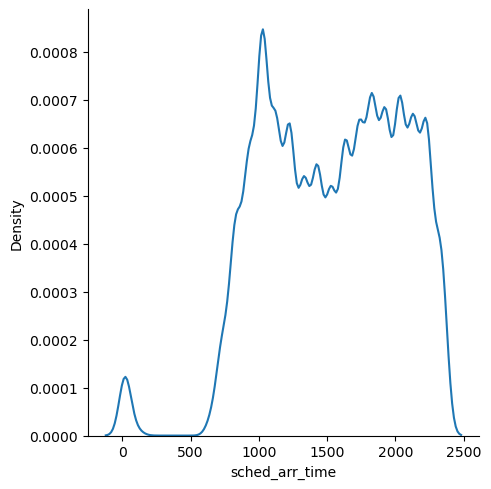

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


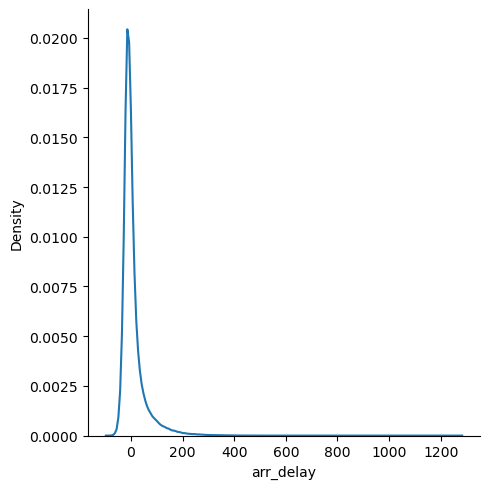

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


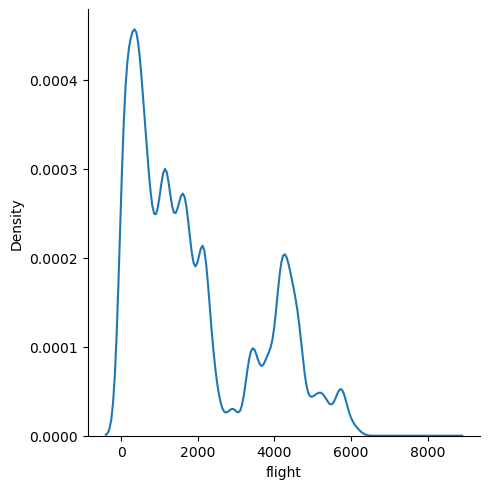

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


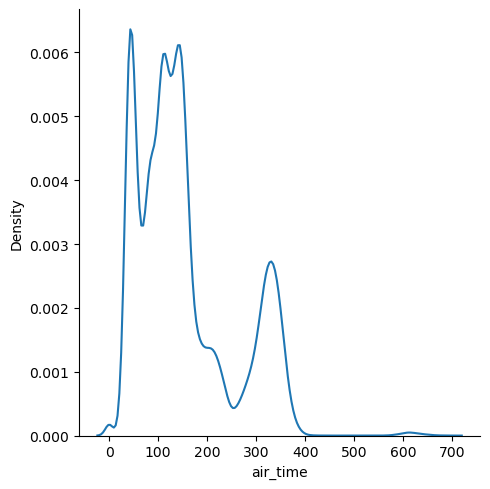

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


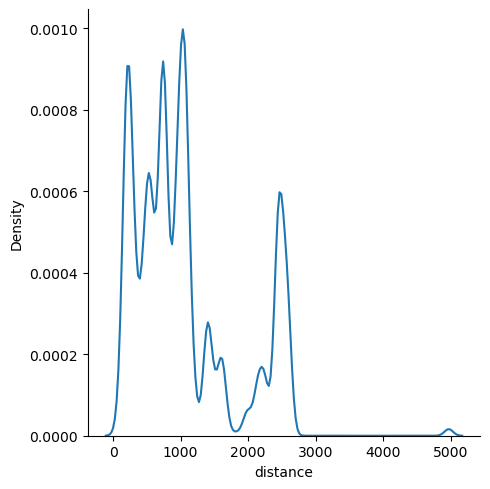

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


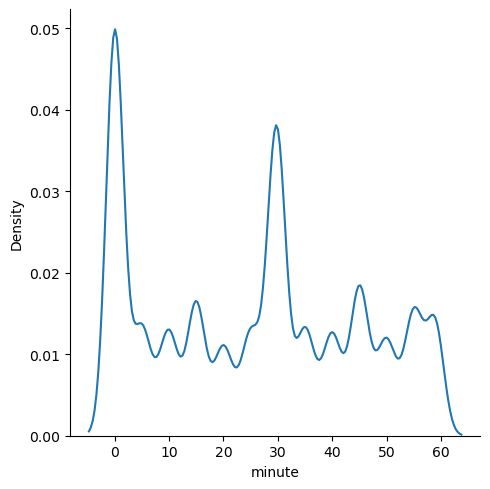

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


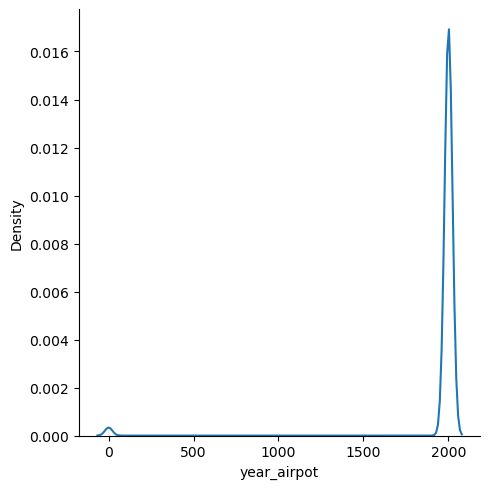

C:\Users\jggl_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


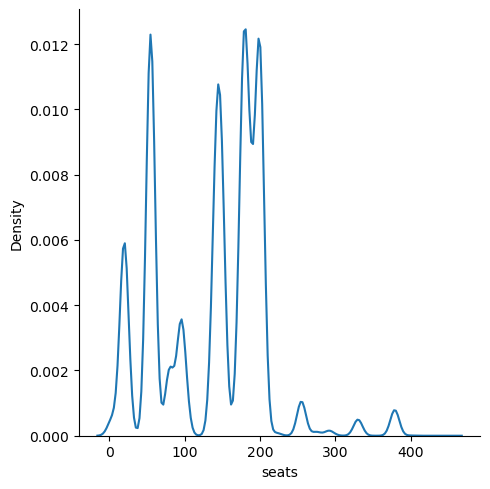

In [212]:
# Por cada columna de continuas se genera una grafica de densidad
for columna in continuas:  
    # Crear gráfica de densidad con seaborn
    sns.displot(df_cubo[columna], kind="kde")
    plt.show()        


### Serie de tiempo con el conteo de apariciones para las de fecha y hora

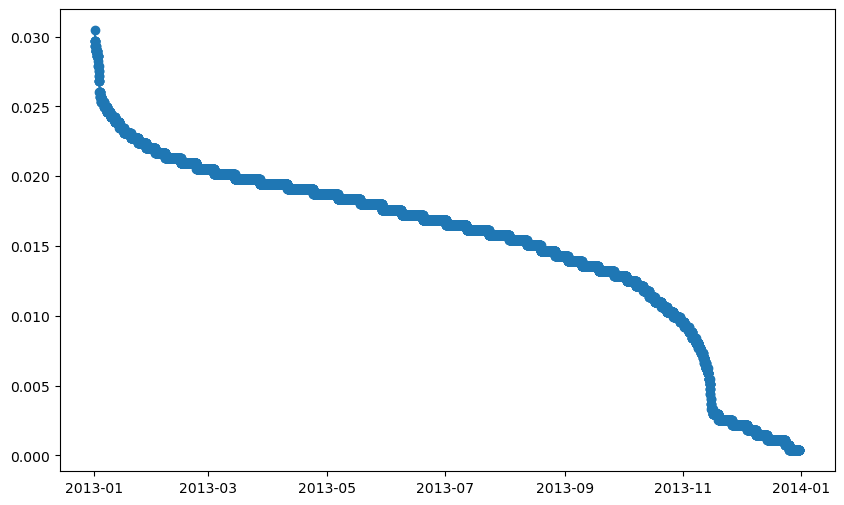

In [223]:
# Definimos el tamaño de la figura
plt.figure(figsize=(10, 6))

for columna in fecha_hora:   
    columna_count = df_cubo[columna].value_counts(normalize = True) *100
    x = list(columna_count.index)
    x.sort()   
    plt.plot(x, columna_count,  marker='o') 
    # Mostrar el gráfico
    plt.show()
 

# Parte Negocios

### 1. Identificar la cantidad de vuelos por Día

In [11]:
# Cargar los datos desde la tabla flights
sql_query = "SELECT * FROM flights;"
flights = pd.read_sql(sql_query, mysql_driver)

# Contar la cantidad de vuelos por día
cantidad_vuelos_por_dia = flights['day'].value_counts()

# Mostrar el resultado
print(cantidad_vuelos_por_dia)

day
18    9336
15    9322
3     9276
21    9200
17    9188
11    9173
20    9136
4     9115
27    9067
13    9059
22    9046
14    9019
16    9002
19    8986
24    8983
6     8975
10    8969
1     8946
26    8938
25    8918
7     8904
12    8890
5     8864
23    8726
2     8673
28    8671
8     8656
9     8579
30    8255
29    8240
31    4401
Name: count, dtype: int64


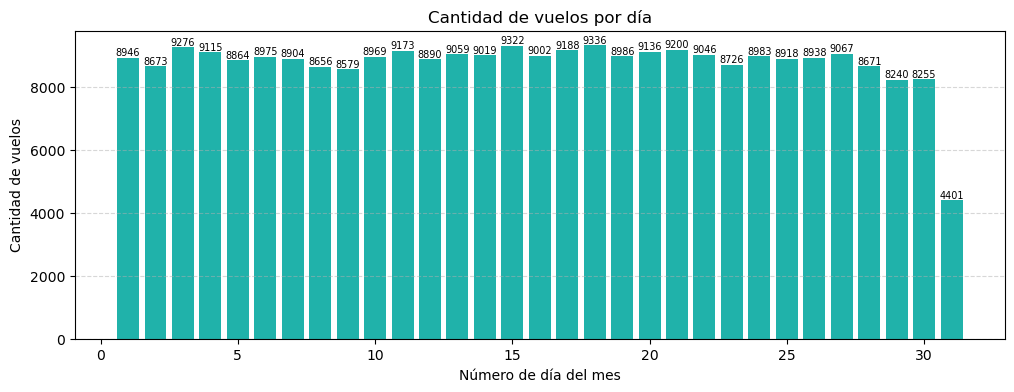

In [12]:
# Contar la cantidad de vuelos por día
cantidad_vuelos_por_dia = flights['day'].value_counts().sort_index()

# Crear un gráfico de barras  
plt.figure(figsize=(12, 4))
bars = plt.bar(cantidad_vuelos_por_dia.index, cantidad_vuelos_por_dia.values, color='lightseagreen', width=0.8)
plt.xlabel('Número de día del mes')
plt.ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos por día')
plt.grid(axis='y', linestyle='--', alpha=0.5)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 3, f"{bar.get_height()}", ha='center', va='bottom', fontsize=7)

plt.show()

### 2. Total de vuelos Mensuales

In [41]:
# Agrupar por mes y contar el total de vuelos
flights_monthly = df_flights.groupby('month').size().reset_index(name='total_flights')

# Mostrar el resultado
print(flights_monthly)

    month  total_flights
0       1          21682
1       2          19473
2       3          23165
3       4          23099
4       5          23645
5       6          22763
6       7          23667
7       8          23861
8       9          22749
9      10          23982
10     11          22647
11     12          21780


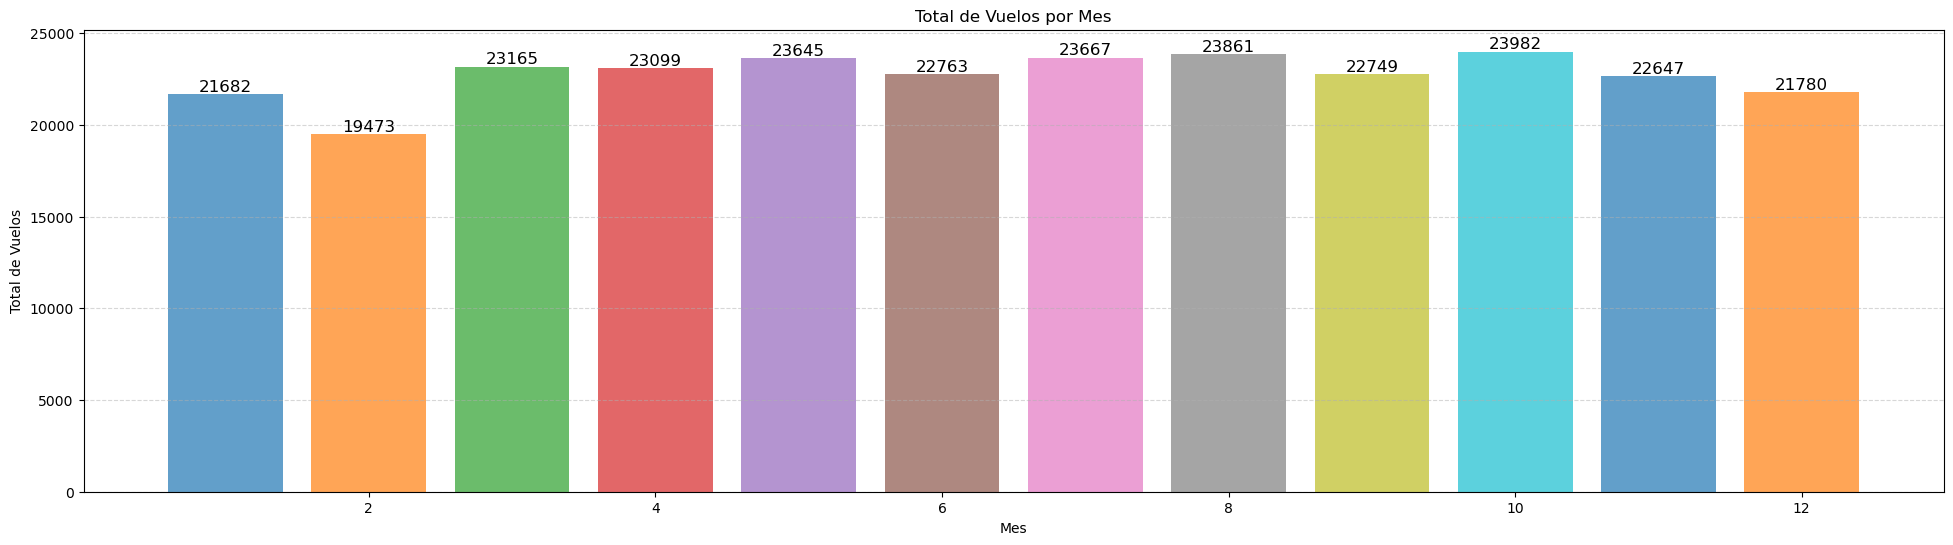

In [43]:
# Crear un gráfico de barras
plt.figure(figsize=(24, 6))
for month in flights_monthly['month'].unique():
    data = flights_monthly[flights_monthly['month'] == month]
    bars = plt.bar(data['month'], data['total_flights'], alpha=0.7, label=month)

  
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(), ha='center', va='bottom', fontsize=12)

plt.xlabel('Mes')
plt.ylabel('Total de Vuelos')
plt.title('Total de Vuelos por Mes')
#plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 3. Total de Vuelos por Mes y Aeropuerto Origen

In [30]:
# Agrupar por mes y origen, contando el total de vuelos
flights_monthly = df_flights.groupby(['month', 'origin']).size().reset_index(name='total_flights')

# Mostrar el resultado
print(flights_monthly)

    month origin  total_flights
0       1    EWR           9036
1       1    JFK           7208
2       1    LGA           5438
3       2    EWR           8069
4       2    JFK           6428
5       2    LGA           4976
6       3    EWR           9372
7       3    JFK           7699
8       3    LGA           6094
9       4    EWR           9618
10      4    JFK           7394
11      4    LGA           6087
12      5    EWR           9736
13      5    JFK           7670
14      5    LGA           6239
15      6    EWR           9197
16      6    JFK           7526
17      6    LGA           6040
18      7    EWR           9522
19      7    JFK           7999
20      7    LGA           6146
21      8    EWR           9498
22      8    JFK           7990
23      8    LGA           6373
24      9    EWR           8883
25      9    JFK           7221
26      9    LGA           6645
27     10    EWR           9486
28     10    JFK           7435
29     10    LGA           7061
30     1

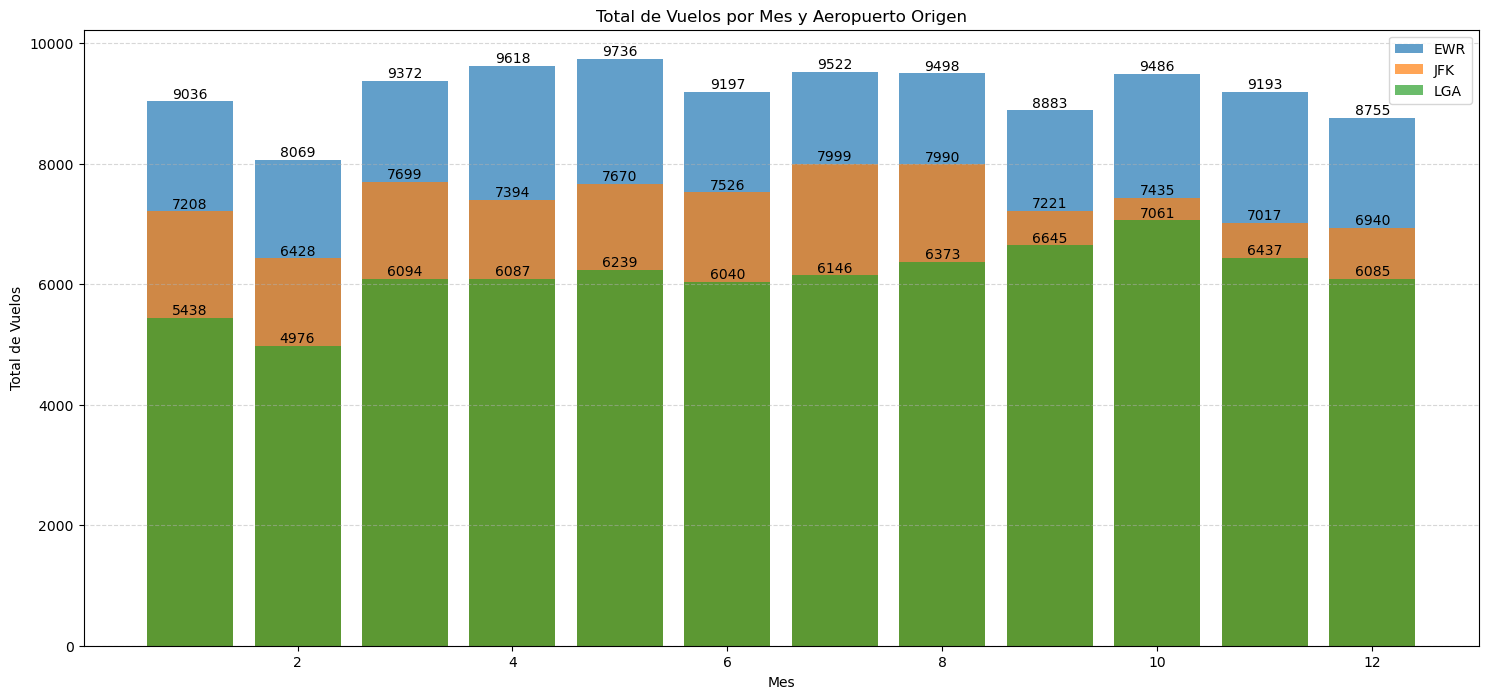

In [31]:
# Crear un gráfico de barras
plt.figure(figsize=(18, 8))
for origin in flights_monthly['origin'].unique():
    data = flights_monthly[flights_monthly['origin'] == origin]
    bars = plt.bar(data['month'], data['total_flights'], alpha=0.7, label=origin)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f"{bar.get_height()}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Mes')
plt.ylabel('Total de Vuelos')
plt.title('Total de Vuelos por Mes y Aeropuerto Origen')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 4. Identificar Países de Destino y cantidad de vuelos

In [67]:
# Hacer el merge entre las tablas df_flights y airports_country
merged_df = pd.merge(df_flights, airports_country, left_on='dest', right_on='faa')

# Agrupar por país y contar el total de vuelos
flights_by_country = merged_df.groupby('country').size().reset_index(name='total_flights')

# Mostrar el resultado
print(flights_by_country)

         country  total_flights
0  United States         272513


'United States'

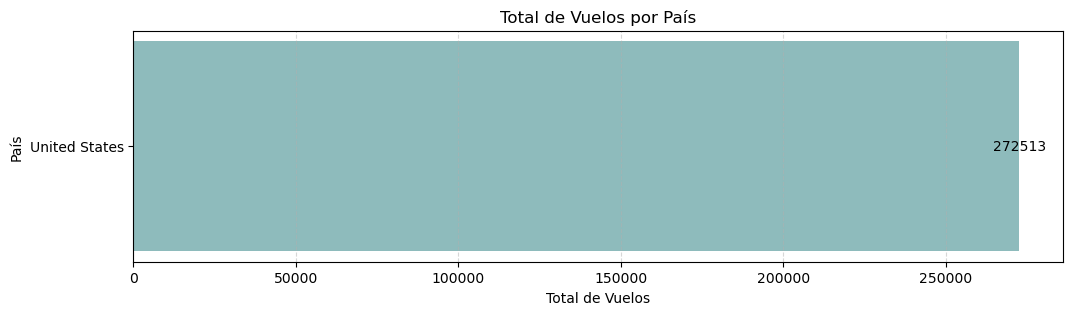

In [37]:
# Crear un gráfico 
plt.figure(figsize=(12, 3))
plt.barh(flights_by_country['country'], flights_by_country['total_flights'], alpha=0.7, color='cadetblue')


for i, bar in enumerate(flights_by_country['total_flights']):
    plt.text(bar + 3, i, f"{bar}", ha='center', va='center', fontsize=10)

plt.xlabel('Total de Vuelos')
plt.ylabel('País')
plt.title('Total de Vuelos por País')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### 5. Identificar Aeropuertos Destino y cantidad de vuelos

In [44]:
# Hacer el merge entre las tablas df_flights y airports_country
merged_df = pd.merge(df_flights, airports_country, left_on='dest', right_on='faa')

# Agrupar por nombre de aeropuerto y contar el total de vuelos
flights_by_airport = merged_df.groupby('name').size().reset_index(name='total_flights')

# Mostrar el resultado
print(flights_by_airport)

                                 name  total_flights
0       Akron Canton Regional Airport            838
1                         Albany Intl            416
2   Albuquerque International Sunport            240
3          Asheville Regional Airport            262
4               Austin Bergstrom Intl           2032
..                                ...            ...
95                  Will Rogers World            325
96                    William P Hobby           2076
97                    Wilmington Intl            106
98                       Yampa Valley             14
99                             Yeager             16

[100 rows x 2 columns]


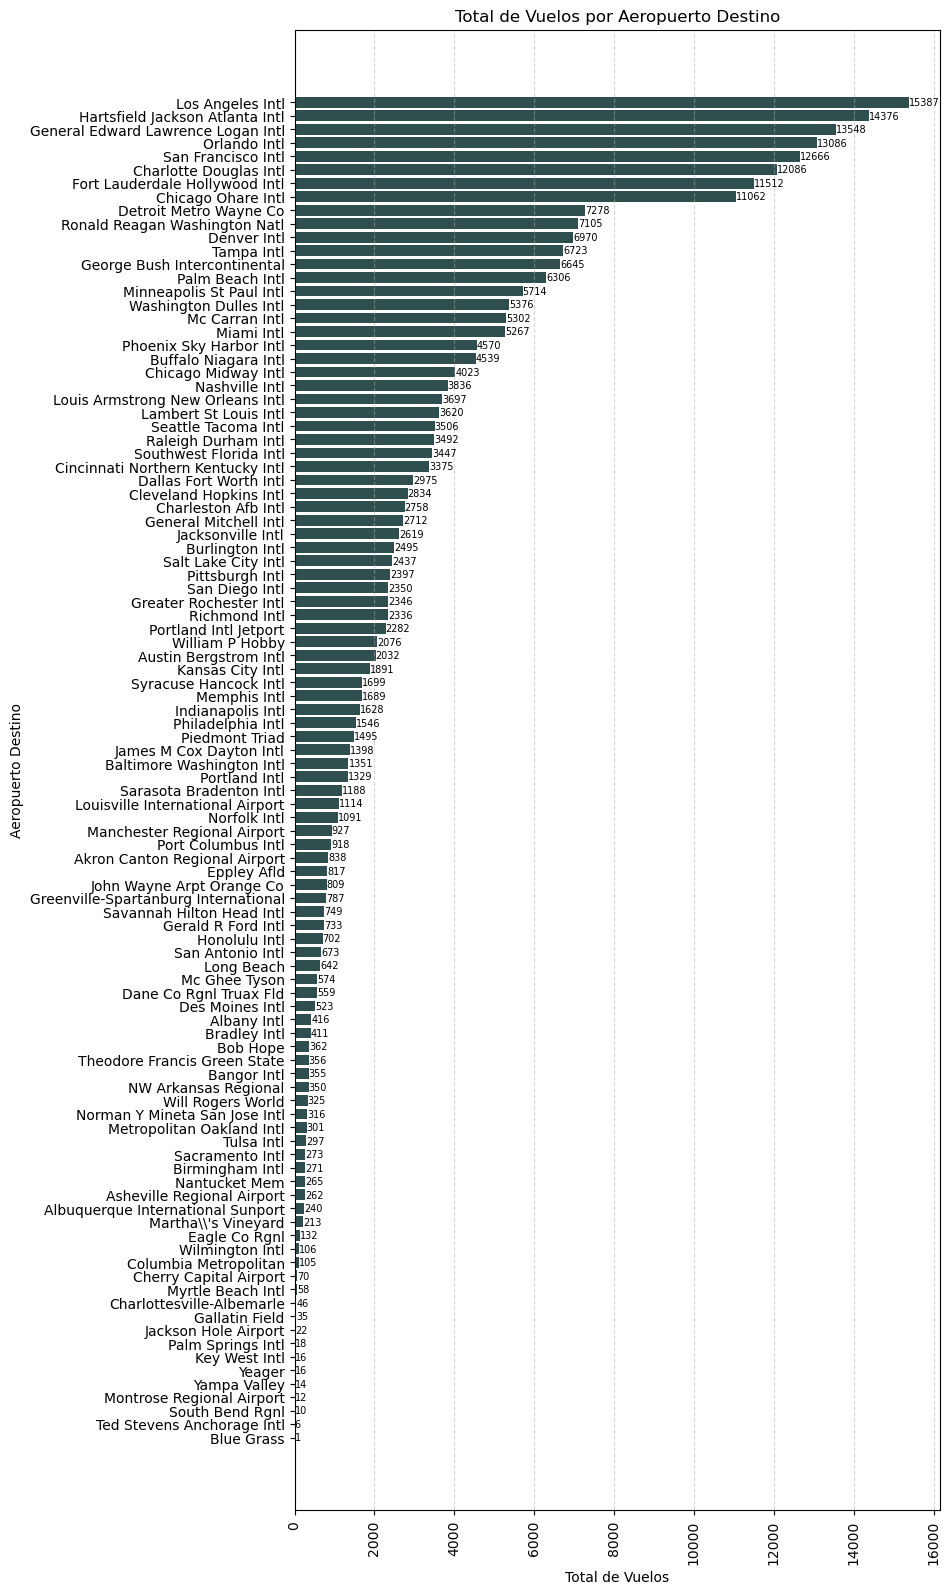

In [45]:
# Ordenar los datos de menor a mayor
flights_by_airport = flights_by_airport.sort_values(by='total_flights')

# Crear un gráfico de barras 
plt.figure(figsize=(10, 16))  
bars = plt.barh(flights_by_airport['name'], flights_by_airport['total_flights'], color='darkslategray')


for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, bar.get_width(), ha='left', va='center', color='black', fontsize=7)

plt.xlabel('Total de Vuelos')
plt.ylabel('Aeropuerto Destino')
plt.title('Total de Vuelos por Aeropuerto Destino')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout(pad=2)  
plt.xticks(rotation=90)  
plt.show()

### 6. Total de vuelos por Aerolínea

In [46]:
# Hacer el merge entre las tablas df_flights y airlines
merged_df = pd.merge(df_flights, df_airlines, left_on='carrier', right_on='carrier')

# Agrupar por nombre de compañía de aerolíneas y contar el total de vuelos
flights_by_airline = merged_df.groupby('name').size().reset_index(name='total_flights')

# Mostrar el resultado
print(flights_by_airline)

                           name  total_flights
0   AirTran Airways Corporation           2993
1          Alaska Airlines Inc.            707
2        American Airlines Inc.           9862
3          Delta Air Lines Inc.          46143
4             Endeavor Air Inc.          17347
5                     Envoy Air            943
6      ExpressJet Airlines Inc.          51111
7        Frontier Airlines Inc.            633
8        Hawaiian Airlines Inc.            340
9               JetBlue Airways          49451
10           Mesa Airlines Inc.            542
11        SkyWest Airlines Inc.             29
12       Southwest Airlines Co.          12019
13              US Airways Inc.          19773
14        United Air Lines Inc.          55516
15               Virgin America           5104


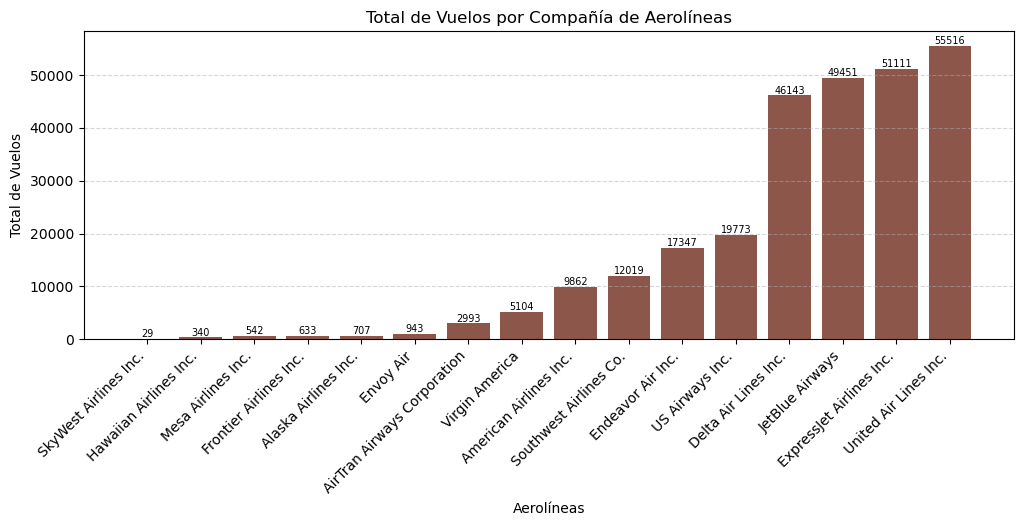

In [47]:
# Ordenar los datos por el total de vuelos de menor a mayor
flights_by_airline = flights_by_airline.sort_values(by='total_flights', ascending=True)

# Crear un gráfico de barras
plt.figure(figsize=(12, 4))
bars = plt.bar(flights_by_airline['name'], flights_by_airline['total_flights'], color='tab:brown')


plt.xticks(rotation=45, ha='right')


plt.xlabel('Aerolíneas')
plt.ylabel('Total de Vuelos')
plt.title('Total de Vuelos por Compañía de Aerolíneas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
 
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(), ha='center', va='bottom', fontsize=7)

# Mostrar el gráfico
plt.show()

### 7. Total de Millas Acumuladas por Aerolíneas

In [48]:
# Hace el merge entre las tablas df_flights y airlines
merged_df = pd.merge(df_flights, df_airlines, left_on='carrier', right_on='carrier')

# Agrupa los datos por compañía de aerolíneas y calcular la suma de las millas recorridas
flights_by_airline = merged_df.groupby('name')['distance'].sum().reset_index(name='total_miles')

# Muestra el resultado
print(flights_by_airline)

                           name  total_miles
0   AirTran Airways Corporation      1973476
1          Alaska Airlines Inc.      1698214
2        American Airlines Inc.     16506675
3          Delta Air Lines Inc.     56712927
4             Endeavor Air Inc.      9220430
5                     Envoy Air       517840
6      ExpressJet Airlines Inc.     28799852
7        Frontier Airlines Inc.      1025460
8        Hawaiian Airlines Inc.      1694220
9               JetBlue Airways     50812888
10           Mesa Airlines Inc.       203694
11        SkyWest Airlines Inc.        14769
12       Southwest Airlines Co.     11987466
13              US Airways Inc.     11071257
14        United Air Lines Inc.     84504165
15               Virgin America     12757237


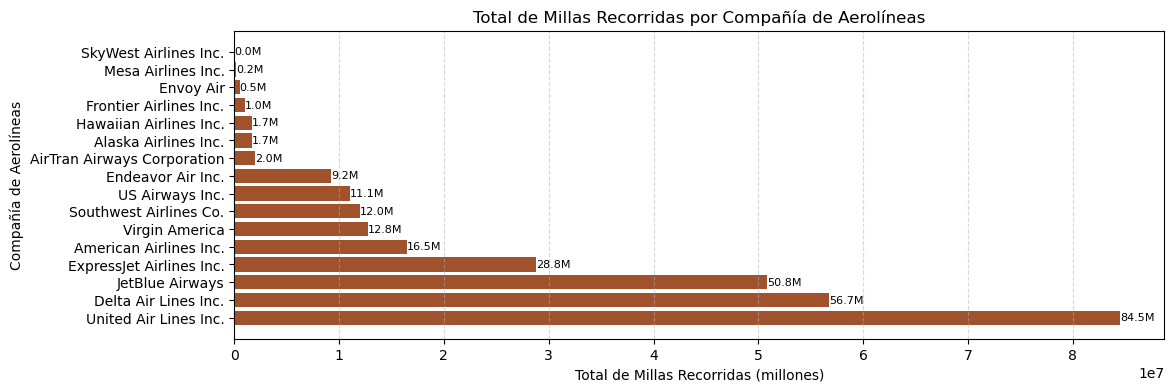

In [49]:
# Ordenar la tabla por el total de millas recorridas  
flights_by_airline = flights_by_airline.sort_values(by='total_miles', ascending=False)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(12, 4))
bars = plt.barh(flights_by_airline['name'], flights_by_airline['total_miles'], color='sienna')

 
for bar in bars:
    miles = bar.get_width()
    label_text = f"{miles / 1000000:.1f}M"
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height() / 2, label_text, ha='left', va='center', fontsize=8)

plt.xlabel('Total de Millas Recorridas (millones)')
plt.ylabel('Compañía de Aerolíneas')
plt.title('Total de Millas Recorridas por Compañía de Aerolíneas')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### 8. Total de Vuelos por Fabricante 

In [51]:
# Hacer el merge entre las tablas df_flights y planes
merged_df = pd.merge(df_flights, df_planes, on='tailnum')

# Agrupar por fabricante y contar el total de vuelos
flights_by_manufacturer = merged_df.groupby('manufacturer').size().reset_index(name='total_flights')

# Mostrar el resultado
print(flights_by_manufacturer)

                     manufacturer  total_flights
0                      AGUSTA SPA             31
1                          AIRBUS          43813
2                AIRBUS INDUSTRIE          40119
3           AMERICAN AIRCRAFT INC             39
4              AVIAT AIRCRAFT INC             18
5          AVIONS MARCEL DASSAULT              4
6                   BARKER JACK L            220
7                           BEECH             43
8                            BELL             63
9                          BOEING          79595
10                 BOMBARDIER INC          27476
11                       CANADAIR           1489
12                   CANADAIR LTD             93
13                         CESSNA            611
14             CIRRUS DESIGN CORP            260
15                    DEHAVILLAND             61
16                        DOUGLAS             22
17                        EMBRAER          63369
18                 FRIEDEMANN JON             58
19           GULFSTR

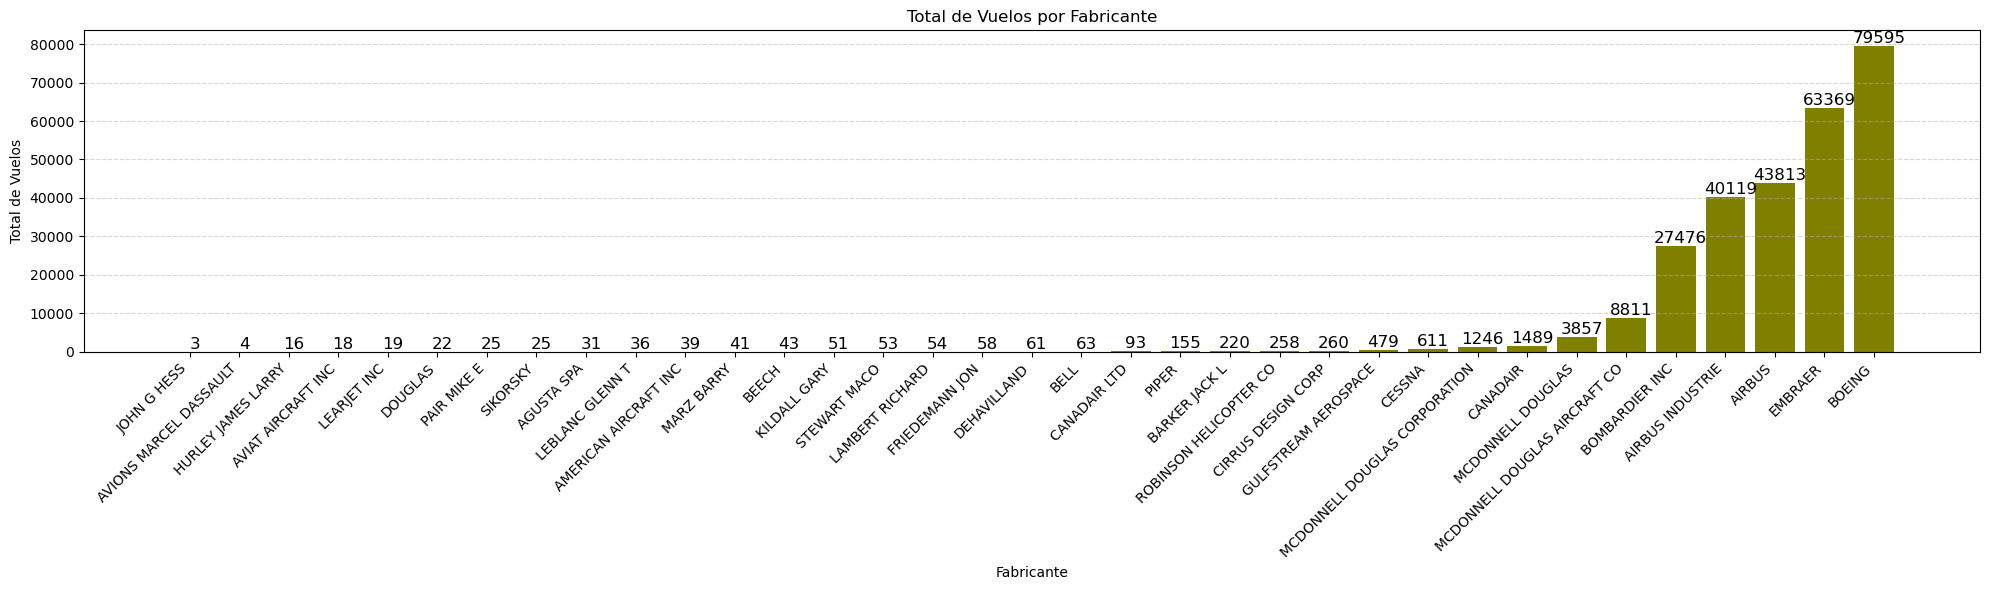

In [52]:
# Ordenar los datos de menor a mayor
flights_by_manufacturer = flights_by_manufacturer.sort_values(by='total_flights', ascending=True)

# Crear un gráfico de barras verticales 
plt.figure(figsize=(20, 6))
bars = plt.bar(flights_by_manufacturer['manufacturer'], flights_by_manufacturer['total_flights'], color='olive', width=0.8)   

 
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() - 0.3, bar.get_height() + 3, bar.get_height(), ha='center', va='bottom', fontsize=12)

plt.xlabel('Fabricante')
plt.ylabel('Total de Vuelos')
plt.title('Total de Vuelos por Fabricante')
plt.grid(axis='y', linestyle='--', alpha=0.5)

 
plt.xticks(rotation=45, ha='right')

plt.tight_layout()   
plt.show()

### 9. Tiempo de vuelo por Aerolínea

In [53]:
# Realizar el merge entre df_flights y df_airlines  
df_fusionado = pd.merge(df_airlines, df_flights, left_on='carrier', right_on='carrier', how='inner')

# Calcular la suma de air_time para cada aerolínea
suma_air_time_por_aerolinea = df_fusionado.groupby('name')['air_time'].sum().reset_index()

# Mostrar el resultado
print(suma_air_time_por_aerolinea)

                           name  air_time
0   AirTran Airways Corporation    299522
1          Alaska Airlines Inc.    229192
2        American Airlines Inc.   2265008
3          Delta Air Lines Inc.   7972676
4             Endeavor Air Inc.   1494543
5                     Envoy Air     83297
6      ExpressJet Airlines Inc.   4580080
7        Frontier Airlines Inc.    145200
8        Hawaiian Airlines Inc.    211805
9               JetBlue Airways   7264203
10           Mesa Airlines Inc.     35516
11        SkyWest Airlines Inc.      2421
12       Southwest Airlines Co.   1770465
13              US Airways Inc.   1745911
14        United Air Lines Inc.  11671337
15               Virgin America   1714649


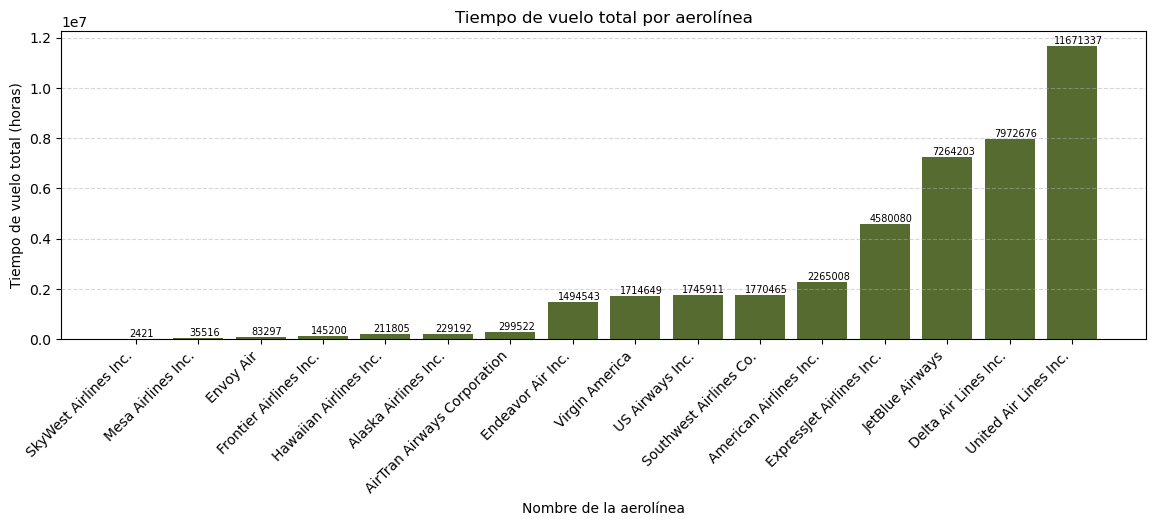

In [54]:
# Ordenar los datos de menor a mayor 
suma_air_time_por_aerolinea = suma_air_time_por_aerolinea.sort_values(by='air_time', ascending=True)

# Crear un gráfico de barras 
plt.figure(figsize=(14, 4))
bars = plt.bar(suma_air_time_por_aerolinea['name'], suma_air_time_por_aerolinea['air_time'], color='darkolivegreen')
plt.xlabel('Nombre de la aerolínea')
plt.ylabel('Tiempo de vuelo total (horas)')
plt.title('Tiempo de vuelo total por aerolínea')
plt.grid(axis='y', linestyle='--', alpha=0.5)

 
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() - 0.3, bar.get_height() + 3, f"{bar.get_height()}", ha='center', va='bottom', fontsize=7)

 
plt.xticks(rotation=45, ha='right')

plt.show()

### 10. Cantidad de vuelos por Tipo de Motor

In [55]:
# Hacer el merge entre las tablas df_flights y planes
merged_df = pd.merge(df_flights, df_planes, on='tailnum')

# Agrupar por fabricante y contar el total de vuelos
flights_by_engine = merged_df.groupby('engine').size().reset_index(name='total_flights')

# Mostrar el resultado
print(flights_by_engine)

          engine  total_flights
0        4 Cycle             37
1  Reciprocating           1650
2      Turbo-fan         230952
3      Turbo-jet          39454
4     Turbo-prop             43
5    Turbo-shaft            377


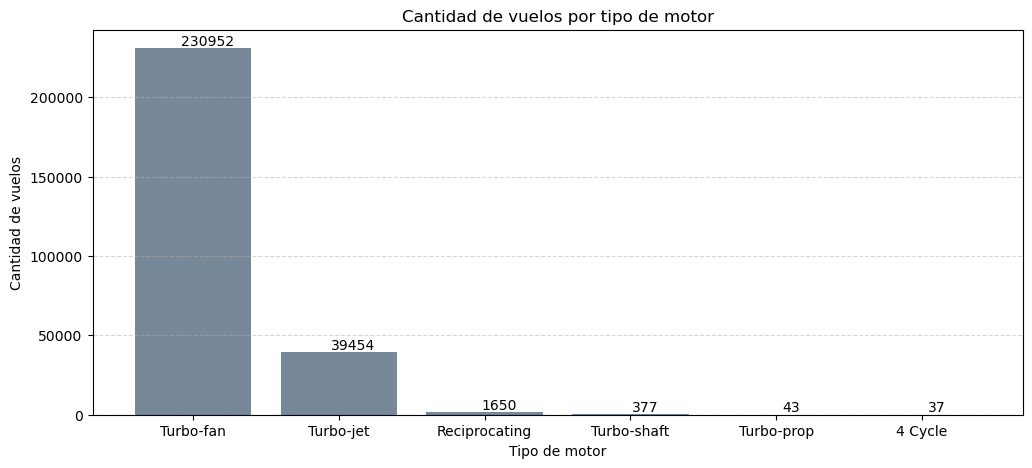

In [56]:
# Ordenar los datos de mayor a menor según la cantidad de vuelos
flights_by_engine_sorted = flights_by_engine.sort_values(by='total_flights', ascending=False)

# Crear un gráfico de barras 
plt.figure(figsize=(12, 5))
bars = plt.bar(flights_by_engine_sorted['engine'], flights_by_engine_sorted['total_flights'], color='lightslategrey')
plt.xlabel('Tipo de motor')
plt.ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos por tipo de motor')
plt.grid(axis='y', linestyle='--', alpha=0.5)

 
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() - 0.3, bar.get_height() + 3, f"{bar.get_height()}", ha='center', va='bottom', fontsize=10)

plt.show()